In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset=pd.read_csv("MOCK_DATA_FINAL.csv")
dataset.head(10)

,store_name,rider_name,store_delivery,rider_store,packaging_time,rating,output
0,The Grocery Outlet,Vedant,4.130,3.088,3.5,3,2
1,Sunrise Mart,Dipak,5.111,3.912,6.5,3,2
2,Superstore Save-On-Foods,Karthikey,4.785,3.718,3.4,3,4
3,Sunrise Mart,Dipak,5.623,1.167,5.1,5,5
4,Bromley Food Store,Rakesh,3.109,3.836,2.3,3,2
5,Superstore Save-On-Foods,Rahul,2.982,2.285,2.4,2,4
6,Bromley Food Store,Anushka,4.268,2.108,4.7,1,5
7,Market Real,Ananya,2.981,3.189,2.6,5,2
8,Bloor Street,Yamraj,4.272,3.294,6.8,3,5
9,Clover Grocery,Yamraj,6.370,2.946,2.6,5,3


## Looking for missing Data

In [3]:
dataset.isna().sum()

store_name        0
rider_name        0
store_delivery    0
rider_store       0
packaging_time    0
rating            0
output            0
dtype: int64

No missing data found.

In [4]:
dataset.dtypes

store_name         object
rider_name         object
store_delivery    float64
rider_store       float64
packaging_time    float64
rating              int64
output              int64
dtype: object

In [5]:
print(dataset.nunique())

store_name          8
rider_name         11
store_delivery    929
rider_store       853
packaging_time     61
rating              5
output              5
dtype: int64


## The first two columns ie, Store_name and Rider_name would not contribute to the decision making process of the ML model, therefore we will drop them.

# Exploratory Data Analysis

In [6]:
# Exploratory Data Analysis

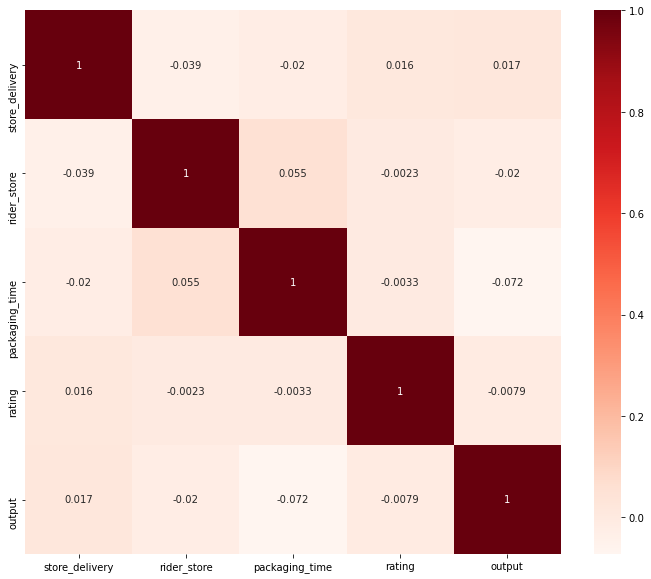

In [7]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:>

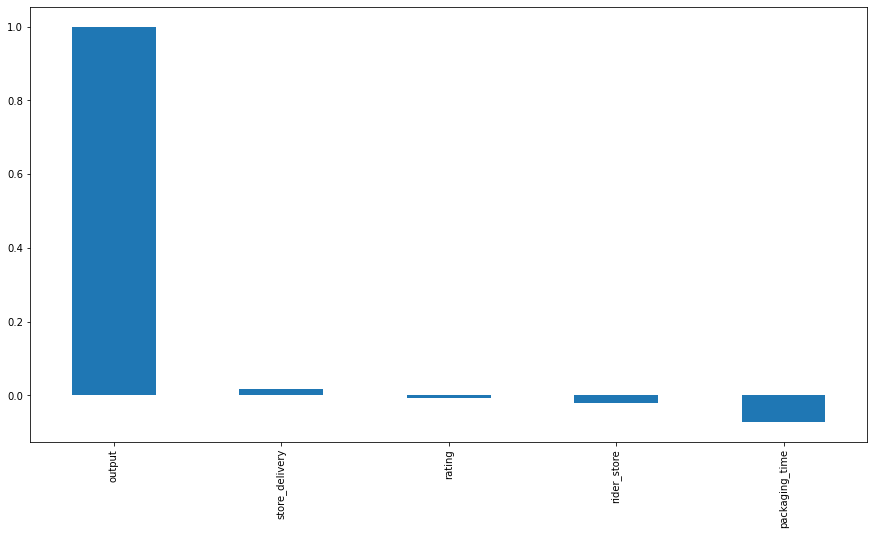

In [8]:
plt.figure(figsize=(15,8))
dataset.corr()['output'].sort_values(ascending = False).plot(kind='bar')

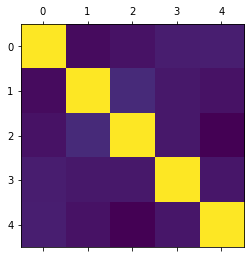

In [9]:
plt.matshow(dataset.corr())
plt.show()

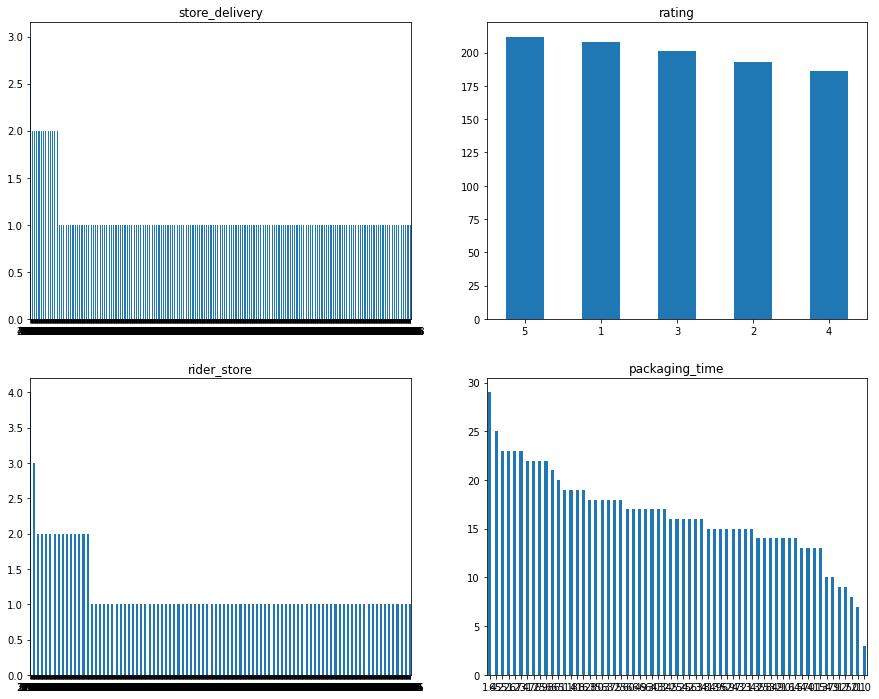

In [10]:
factors = ['store_delivery','rider_store',
           'packaging_time','rating']

fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,12))
for i, item in enumerate(factors):
    if i < 2:
        ax =dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=2 and i < 6:
        ax =dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax =dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

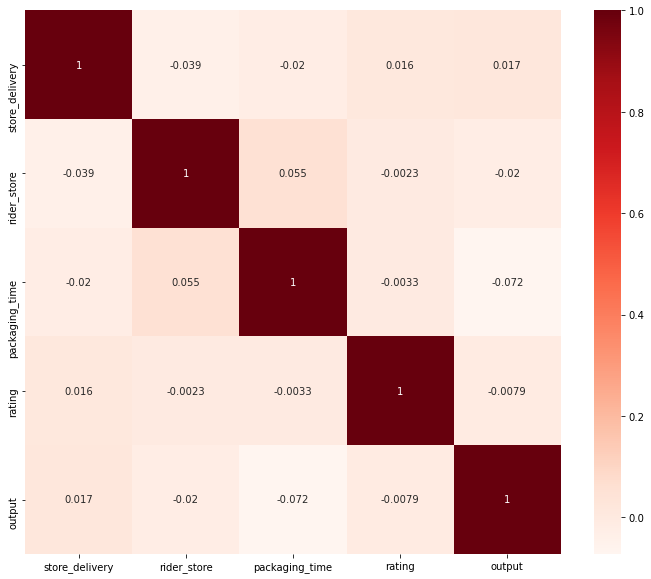

In [11]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title="Pandas Profiling Report", explorative=True)

In [13]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


## Machine learning Model

In [14]:
x=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

## Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
print(x_train)

[[-0.30245322  0.67307746  1.40943295  0.71212449]
 [-0.59033096  0.69349762  1.52364441 -1.37553689]
 [ 0.9408116  -0.26965325  1.18101001 -0.67964976]
 ...
 [ 0.71830848  0.63223714  1.29522148  0.71212449]
 [ 1.15815356 -1.29973688 -0.36084478  0.71212449]
 [ 0.78769734 -1.55385443  1.46653868 -0.67964976]]


## Predictive Model

In [18]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logrf = LogisticRegression()
result = logrf.fit(x_train, y_train)

from sklearn import metrics
prediction_test = logrf.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.19


# Random Forest Classifier

In [20]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=333; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=333; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=333; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=866; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=866; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=866; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 333, 466, 600,
                                                         733, 866, 1000, 1133,
                                                         1266, 1400]},
                   random_state=42, verbose=2)

In [21]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(
  max_depth=90, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=333,
                       oob_score = True, n_jobs = -1,random_state =50,max_leaf_nodes = 30,criterion='gini')
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
con_mat=metrics.confusion_matrix(y_test,pred)
print("confusion-matrix \n",con_mat)
acc_score=metrics.accuracy_score(y_test,pred)
print(acc_score)

confusion-matrix 
 [[ 5  3  0  4  1]
 [ 6  4  2  2  2]
 [10  3  2  7  2]
 [10  5  2  4  4]
 [ 8  5  0  7  2]]
0.17


# Support Vector Machine

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

svm = SVC(kernel='linear') 
svm.fit(x_train,y_train)
preds = svm.predict(x_test)
print(metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds)) 

0.21
[[ 8  0  0  5  0]
 [ 9  0  0  7  0]
 [17  0  0  7  0]
 [11  1  0 13  0]
 [11  0  0 11  0]]


In [24]:
score=cross_val_score(svm,x,y,cv=10)
#print(score)
mean=np.array(score).mean()
print("cross-validation score:",mean)

cross-validation score: 0.23900000000000002


# Adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada.fit(x_train,y_train)
preds = ada.predict(x_test)
print(metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds)) 

0.24
[[ 5  2  2  3  1]
 [ 7  2  3  3  1]
 [ 7  0 10  6  1]
 [10  5  4  5  1]
 [ 7  3  6  4  2]]


# K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
preds = knn.predict(x_test)
print(metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds))

0.22
[[6 1 1 1 4]
 [5 3 2 5 1]
 [7 4 5 4 4]
 [9 6 4 4 2]
 [8 2 2 6 4]]


# Ensemble Method

In [27]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
estimators=[('lr', logrf), ('rf', RFC), ('svc', svm),('ada',ada)], voting='hard'
)
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=90,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=30,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=333,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=50)),
                             ('svc', SVC(kernel='linear')),
                             ('ada', AdaBoostClassifier())])

In [28]:
preds=voting_clf.predict(x_test)
print(metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds)) 

0.2
[[ 6  3  0  4  0]
 [ 9  3  0  4  0]
 [16  0  1  7  0]
 [12  3  0  9  1]
 [11  3  0  7  1]]


In [29]:
import pickle

# Saving The ML Model

In [36]:
filename = 'finalized_model.sav'
pickle.dump(voting_clf, open(filename, 'wb'),protocol=2)
 

In [38]:
ada_name='ada_model.sav'
pickle.dump(ada,open(ada_name, 'wb'),protocol=2)

In [40]:
svm_name='svm_model.sav'
pickle.dump(ada,open(svm_name, 'wb'),protocol=2)

In [41]:
import sklearn

In [43]:
import pickle
def prediction_model(store_delivery,rider_store,packaging_time,rating):
    x = [[store_delivery,rider_store,packaging_time,rating]]
    voting_classifier = pickle.load(open('svm_model.sav','rb'))
    prediction = voting_classifier.predict(x)
    return prediction

help=prediction_model(4.13,3.088,3.5,3)
print(help)

[5]
